###  Candle Stick Classification

In [14]:
import pandas as pd 
import pandas_ta as pd_ta 
import numpy as np 
import matplotlib.pyplot as plt
import mplfinance as mpf 


In [80]:
import sys
print(sys.executable)


/Users/pituchai/.pyenv/versions/3.10.6/bin/python


In [34]:
df =pd.read_feather("/Users/pituchai/bot_trade/algo_trading_bot/freqtrade/user_data/data/binance/futures/BTC_USDT_USDT-5m-futures.feather") 

In [35]:
df.index = pd.to_datetime(df['date'], unit='s')

In [36]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [37]:
df 

,date,open,high,low,close,volume
date,,,,,,
2025-01-01 00:00:00+00:00,2025-01-01 00:00:00+00:00,93548.8,93690.0,93514.2,93648.4,341.604
2025-01-01 00:05:00+00:00,2025-01-01 00:05:00+00:00,93648.3,93666.7,93576.9,93585.9,166.341
2025-01-01 00:10:00+00:00,2025-01-01 00:10:00+00:00,93586.0,93637.2,93460.2,93631.2,480.204
2025-01-01 00:15:00+00:00,2025-01-01 00:15:00+00:00,93631.2,93829.4,93588.0,93781.0,545.647
2025-01-01 00:20:00+00:00,2025-01-01 00:20:00+00:00,93781.0,93885.0,93680.0,93712.0,392.042
...,...,...,...,...,...,...
2025-06-23 19:40:00+00:00,2025-06-23 19:40:00+00:00,102780.0,102784.3,102651.5,102671.1,356.986
2025-06-23 19:45:00+00:00,2025-06-23 19:45:00+00:00,102671.0,102827.0,102620.1,102778.8,395.777
2025-06-23 19:50:00+00:00,2025-06-23 19:50:00+00:00,102778.8,103043.8,102753.7,103035.7,965.807


In [38]:
df.tail() 

,date,open,high,low,close,volume
date,,,,,,
2025-06-23 19:40:00+00:00,2025-06-23 19:40:00+00:00,102780.0,102784.3,102651.5,102671.1,356.986
2025-06-23 19:45:00+00:00,2025-06-23 19:45:00+00:00,102671.0,102827.0,102620.1,102778.8,395.777
2025-06-23 19:50:00+00:00,2025-06-23 19:50:00+00:00,102778.8,103043.8,102753.7,103035.7,965.807
2025-06-23 19:55:00+00:00,2025-06-23 19:55:00+00:00,103035.7,103194.0,102916.1,103114.2,910.176
2025-06-23 20:00:00+00:00,2025-06-23 20:00:00+00:00,103114.2,103250.2,102818.4,102923.6,1700.423


### Create the Structure for the strategy

In [39]:
# Add candle type with 'bull' or 'bear' 
df['cd_type'] = np.where( df['close'] > df['open'], 'bull', 'bear')

In [40]:
# IQR of candle stick body
df['cd_body_spread'] = np.abs(df['open'] - df['close']) 
# An entire candle stick spread
# This is the range of the candle stick, from high to low
df['cd_full_spread'] = np.abs(df['high'] - df['low']) 

In [ ]:

# Buying pressure 
df['cd_demand_tail'] = np.where(
      df['cd_type'] == 'bull',  
      np.abs(df['low'] - df['open']),
      np.abs(df['low'] - df['close'])                               
                                )
#Selling pressure
df['cd_supply_tail'] = np.where(
      df['cd_type'] == 'bull', 
      np.abs(df['high'] - df['close']),
      np.abs(df['high'] - df['open'])
      )

df['vol_spread'] = df['volume']  


# Bull and Bear for volume and candle stick spread
df['bull_volume'] = np.where(
    df['cd_type'] == 'bull',
    df['volume'],
    np.nan
)
df['bear_volume'] = np.where(
    df['cd_type'] == 'bear',
    df['volume'],
    np.nan
)

# Bull and Bear for full candle stick spread
df['bull_cd_full_spread'] = np.where(
    df['cd_type'] == 'bull',
    df['cd_full_spread'],
    np.nan
)
df['bear_cd_full_spread'] = np.where(
    df['cd_type'] == 'bear',
    df['cd_full_spread'],
    np.nan
)

# Bull and Bear for candle stick body spread
df['bull_cd_body_spread'] = np.where(
    df['cd_type'] == 'bull',
    df['cd_body_spread'],
    np.nan
)
df['bear_cd_body_spread'] = np.where(
    df['cd_type'] == 'bear',
    df['cd_body_spread'],
    np.nan
)

# Bull and Bear for demand tail
df['bull_cd_demand_tail'] = np.where(
    df['cd_type'] == 'bull',
    df['cd_demand_tail'],
    np.nan
) 
df['bear_cd_demand_tail'] = np.where(
    df['cd_type'] == 'bear',
    df['cd_demand_tail'],
    np.nan
) 

# Bull and Bear for supply tail
df['bull_cd_supply_tail'] = np.where(
    df['cd_type'] == 'bull',
    df['cd_supply_tail'],
    np.nan
)
df['bear_cd_supply_tail'] = np.where(
    df['cd_type'] == 'bear',
    df['cd_supply_tail'],
    np.nan
)


In [42]:
df

,date,open,high,low,close,volume,cd_type,cd_body_spread,cd_full_spread,cd_demand_tail,...,bull_volume,bear_volume,bull_cd_full_spread,bear_cd_full_spread,bull_cd_body_spread,bear_cd_body_spread,bull_cd_demand_tail,bear_cd_demand_tail,bull_cd_supply_tail,bear_cd_supply_tail
date,,,,,,,,,,,,,,,,,,,,,
2025-01-01 00:00:00+00:00,2025-01-01 00:00:00+00:00,93548.8,93690.0,93514.2,93648.4,341.604,bull,99.6,175.8,34.6,...,341.604,NaN,175.8,NaN,99.6,NaN,34.6,NaN,41.6,NaN
2025-01-01 00:05:00+00:00,2025-01-01 00:05:00+00:00,93648.3,93666.7,93576.9,93585.9,166.341,bear,62.4,89.8,9.0,...,NaN,166.341,NaN,89.8,NaN,62.4,NaN,9.0,NaN,18.4
2025-01-01 00:10:00+00:00,2025-01-01 00:10:00+00:00,93586.0,93637.2,93460.2,93631.2,480.204,bull,45.2,177.0,125.8,...,480.204,NaN,177.0,NaN,45.2,NaN,125.8,NaN,6.0,NaN
2025-01-01 00:15:00+00:00,2025-01-01 00:15:00+00:00,93631.2,93829.4,93588.0,93781.0,545.647,bull,149.8,241.4,43.2,...,545.647,NaN,241.4,NaN,149.8,NaN,43.2,NaN,48.4,NaN
2025-01-01 00:20:00+00:00,2025-01-01 00:20:00+00:00,93781.0,93885.0,93680.0,93712.0,392.042,bear,69.0,205.0,32.0,...,NaN,392.042,NaN,205.0,NaN,69.0,NaN,32.0,NaN,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23 19:40:00+00:00,2025-06-23 19:40:00+00:00,102780.0,102784.3,102651.5,102671.1,356.986,bear,108.9,132.8,19.6,...,NaN,356.986,NaN,132.8,NaN,108.9,NaN,19.6,NaN,4.3
2025-06-23 19:45:00+00:00,2025-06-23 19:45:00+00:00,102671.0,102827.0,102620.1,102778.8,395.777,bull,107.8,206.9,50.9,...,395.777,NaN,206.9,NaN,107.8,NaN,50.9,NaN,48.2,NaN
2025-06-23 19:50:00+00:00,2025-06-23 19:50:00+00:00,102778.8,103043.8,102753.7,103035.7,965.807,bull,256.9,290.1,25.1,...,965.807,NaN,290.1,NaN,256.9,NaN,25.1,NaN,8.1,NaN


### Show the distribution of IQR candle stick

<Axes: ylabel='Frequency'>

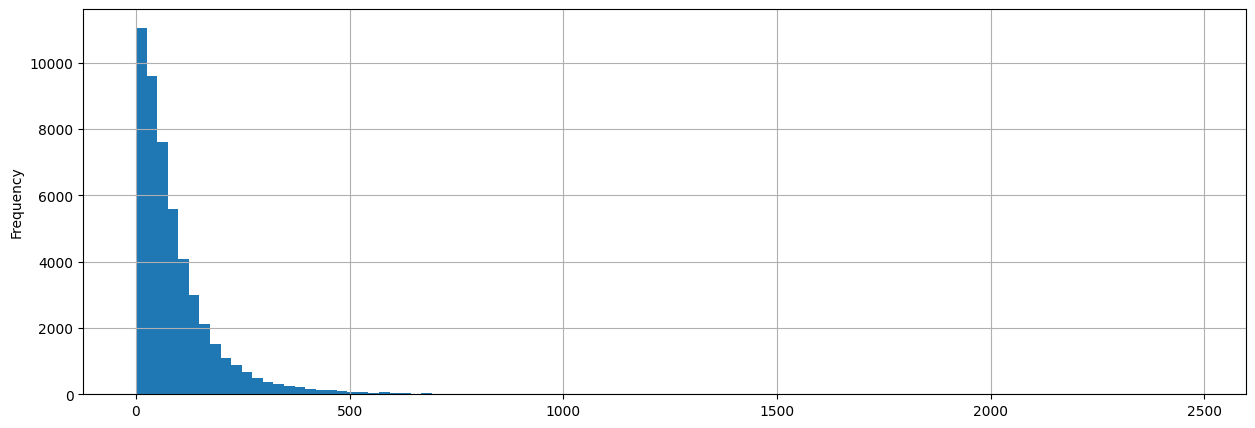

In [43]:

df['cd_body_spread'][:-100].plot(kind="hist", bins=100, figsize=(15, 5), grid=True)

### Setting volume with SMA and Standard Deviation 

In [62]:
#Volume that spreads on standard deviation
df['vol_spread_stdev'] = pd_ta.stdev(df['vol_spread'], length=30)
#Simple Moving Average of volume spread 
df['vol_sma_30'] = pd_ta.sma(df['vol_spread'], length=30)

#A signal band 1 standard deviation above the moving average.
"""
It’s useful for spotting outliers or shifts in market behavior.
You use + 1.0 * std to set a dynamic upper threshold that adapts to recent volatility. 
2.0 for 2 standard deviations (common in Bollinger Bands),
"""
df['vol_spread_stdev_1'] =  df['vol_sma_30'] + 1.0 * df['vol_spread_stdev']
df['vol_spread_stdev_2'] =  df['vol_sma_30'] + 2.0 * df['vol_spread_stdev']
df['vol_spread_stdev_3'] =  df['vol_sma_30'] + 3.0 * df['vol_spread_stdev']


### Setting candle body with SMA and Standard Deviation 

In [63]:
df['cd_body_spread_sma_30'] = pd_ta.sma(df['cd_body_spread'], length=30)
df['cd_body_spread_stdev'] = pd_ta.stdev(df['cd_body_spread'], length=30)

df['cd_body_spread_stdev_1'] = df['cd_body_spread_sma_38'] + 1.0 * df['cd_body_spread_stdev']
df['cd_body_spread_stdev_2'] = df['cd_body_spread_sma_38'] + 2.0 * df['cd_body_spread_stdev']
df['cd_body_spread_stdev_3'] = df['cd_body_spread_sma_38'] + 3.0 * df['cd_body_spread_stdev']

### Setting full candel body with SMA and Strandard Deviation

In [ ]:
df['cd_full_spread_sma_30'] = pd_ta.sma(df['cd_full_spread'], length=30)
df['cd_full_spread_stdev'] = pd_ta.stdev(df['cd_full_spread'], length=30)

df['cd_full_spread_stdev_1'] = df['cd_full_spread_sma_30'] + 1.0 * df['cd_full_spread_stdev']
df['cd_full_spread_stdev_2'] = df['cd_full_spread_sma_30'] + 2.0 * df['cd_full_spread_stdev']
df['cd_full_spread_stdev_3'] = df['cd_full_spread_sma_30'] + 3.0 * df['cd_full_spread_stdev']


### Setting demand tail with SMA and Strandard Deviation

In [68]:
df['cd_demand_tail_sma_30'] = pd_ta.sma(df['cd_demand_tail'], length=30)
df['cd_demand_tail_stdev'] = pd_ta.stdev(df['cd_demand_tail'], length=30)

df['cd_demand_tail_stdev_1'] = df['cd_demand_tail_sma_30'] + 1.0 * df['cd_demand_tail_stdev']
df['cd_demand_tail_stdev_2'] = df['cd_demand_tail_sma_30'] + 2.0 * df['cd_demand_tail_stdev']
df['cd_demand_tail_stdev_3'] = df['cd_demand_tail_sma_30'] + 3.0 * df['cd_demand_tail_stdev']



### Setting supply tail with SMA and Strandard Deviation 


In [ ]:
df['cd_supply_tail_sma_30'] = pd_ta.sma(df['cd_supply_tail'], length=30)
df['cd_supply_tail_stdev'] = pd_ta.stdev(df['cd_supply_tail'], length=30)

df['cd_supply_tail_stdev_1'] = df['cd_supply_tail_sma_30'] + 1.0 * df['cd_supply_tail_stdev']
df['cd_supply_tail_stdev_2'] = df['cd_supply_tail_sma_30'] + 2.0 * df['cd_supply_tail_stdev']
df['cd_supply_tail_stdev_3'] = df['cd_supply_tail_sma_30'] + 3.0 * df['cd_supply_tail_stdev']

In [ ]:
#create line chart in candlestick chart
df['close_sma_30'] = pd_ta.sma(df['close'], length=30)
       

In [61]:
#since SMA need to use window of 30, that means the first 30 rows will be NaN to use to calculate the first value
df.tail(100)

,date,open,high,low,close,volume,cd_type,cd_body_spread,cd_full_spread,cd_demand_tail,...,cd_body_spread_sma_38,cd_body_spread_stdev,cd_body_spread_stdev_1,cd_body_spread_stdev_2,cd_body_spread_stdev_3,cd_full_spread_sma_38,cd_full_spread_stdev,cd_full_spread_stdev_1,cd_full_spread_stdev_2,cd_full_spread_stdev_3
date,,,,,,,,,,,,,,,,,,,,,
2025-06-23 11:45:00+00:00,2025-06-23 11:45:00+00:00,101228.0,101309.0,101071.1,101309.0,611.576,bull,81.0,237.9,156.9,...,59.739474,56.429945,116.169418,172.599363,229.029308,108.192105,58.947867,167.139972,226.087839,285.035706
2025-06-23 11:50:00+00:00,2025-06-23 11:50:00+00:00,101308.9,101384.9,101266.0,101330.3,382.185,bull,21.4,118.9,42.9,...,58.818421,56.770533,115.588954,172.359487,229.130021,109.836842,58.332442,168.169284,226.501725,284.834167
2025-06-23 11:55:00+00:00,2025-06-23 11:55:00+00:00,101330.3,101339.0,101245.6,101248.5,331.984,bear,81.8,93.4,2.9,...,58.423684,56.551027,114.974711,171.525737,228.076764,109.486842,58.391642,167.878484,226.270126,284.661769
2025-06-23 12:00:00+00:00,2025-06-23 12:00:00+00:00,101248.4,101274.9,101150.0,101182.4,308.338,bear,66.0,124.9,32.4,...,58.184211,56.497742,114.681953,171.179695,227.677437,109.900000,58.445077,168.345077,226.790154,285.235231
2025-06-23 12:05:00+00:00,2025-06-23 12:05:00+00:00,101182.4,101196.9,101137.1,101191.9,203.380,bull,9.5,59.8,45.3,...,57.218421,57.019413,114.237834,171.257247,228.276659,109.339474,58.829628,168.169102,226.998730,285.828358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23 19:40:00+00:00,2025-06-23 19:40:00+00:00,102780.0,102784.3,102651.5,102671.1,356.986,bear,108.9,132.8,19.6,...,167.984211,136.497782,304.481993,440.979775,577.477558,350.323684,175.682474,526.006158,701.688632,877.371105
2025-06-23 19:45:00+00:00,2025-06-23 19:45:00+00:00,102671.0,102827.0,102620.1,102778.8,395.777,bull,107.8,206.9,50.9,...,162.139474,134.111506,296.250979,430.362485,564.473991,334.178947,158.683271,492.862219,651.545490,810.228762
2025-06-23 19:50:00+00:00,2025-06-23 19:50:00+00:00,102778.8,103043.8,102753.7,103035.7,965.807,bull,256.9,290.1,25.1,...,161.710526,133.772323,295.482850,429.255173,563.027496,326.955263,154.091959,481.047222,635.139181,789.231139


### Setting Strategy 

In [91]:
df['entering_long_trade'] = np.nan
df['entering_short_trade'] = np.nan

# Checking uptrends or not (long)
df.loc[
    (df['close_sma_30'] > df['close_sma_30'].shift(1)) &
    (df['cd_type'] == 'bull') &
    # good body spread
    (df['cd_body_spread'] > df['cd_body_spread_stdev_1']) &
    # good volume spread
    (df['vol_spread'] > df['vol_spread_stdev_1']),
    'entering_long_trade'
] = df['low']

# Checking downtrends or not (short)
df.loc[
    (df['close_sma_30'] < df['close_sma_30'].shift(1)) &
    (df['cd_type'] == 'bear') &
    # good body spread
    (df['cd_body_spread'] > df['cd_body_spread_stdev_1']) &
    # good volume spread
    (df['vol_spread'] > df['vol_spread_stdev_1']),
    'entering_short_trade'
] = df['high']

# Count rows where either entering_long_trade or entering_short_trade is not NaN
df.loc[
    df['entering_long_trade'].notna() | df['entering_short_trade'].notna()
].shape[0]

2409

### Plotting to show the result 

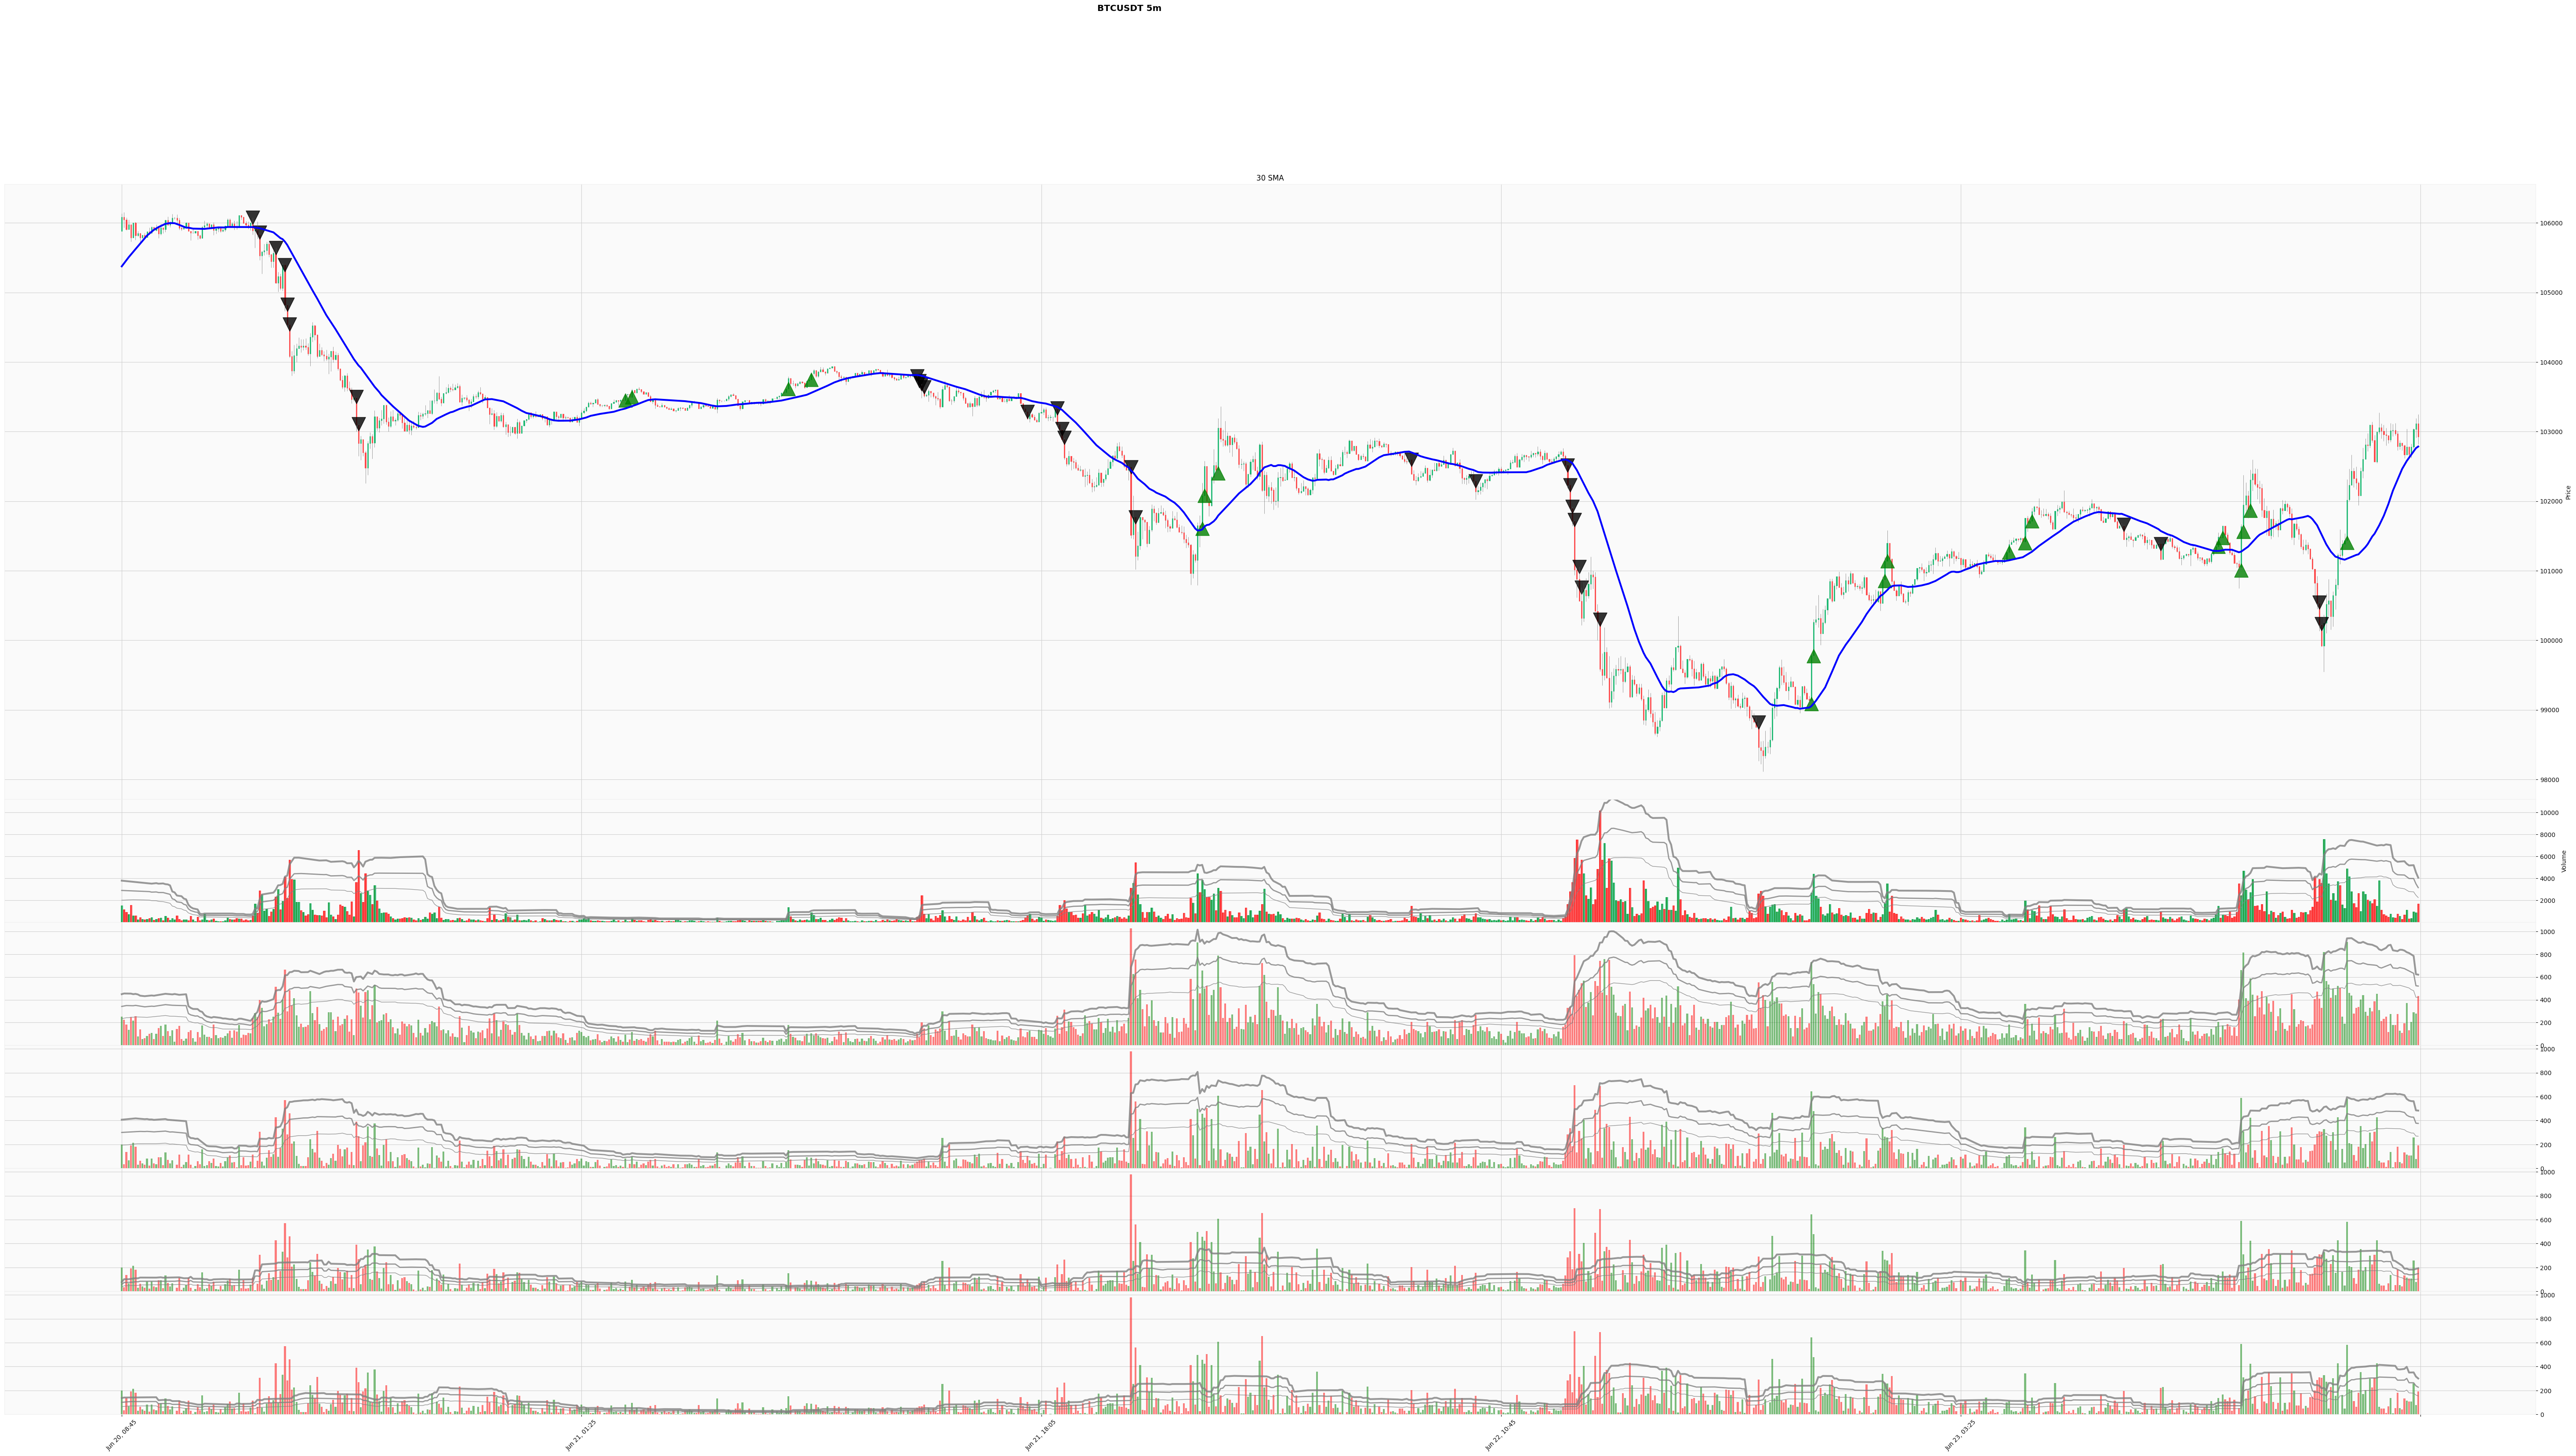

In [102]:
_df = df[-1000:].copy(deep=True)


# for each one inside tuple, represent as one graph 
# for volume
addplot = [
      mpf.make_addplot(_df['bull_volume'], panel=1, type= 'bar',  width=0.5, alpha=0.5, secondary_y=False, color='green'),
      mpf.make_addplot(_df['bear_volume'], panel=1,type = 'bar',width=0.5, alpha=0.5, secondary_y=False, color='red'),

      mpf.make_addplot(_df['vol_spread_stdev_1'], panel=1,type = 'line',width=1, alpha=0.8, secondary_y=False, color='gray'),
      mpf.make_addplot(_df['vol_spread_stdev_2'], panel=1,type = 'line',width=2, alpha=0.8, secondary_y=False, color='gray'),
      mpf.make_addplot(_df['vol_spread_stdev_3'], panel=1,type = 'line',width=3, alpha=0.8, secondary_y=False, color='gray'),

]
           

# full candle body spread
addplot.extend([
    mpf.make_addplot(_df['bull_cd_full_spread'], type='bar', color='green', alpha=0.5, panel=2, secondary_y=False),
    mpf.make_addplot(_df['bear_cd_full_spread'], type='bar', color='red', alpha=0.5, panel=2, secondary_y=False),

    mpf.make_addplot(_df['cd_full_spread_stdev_1'], type='line', width =1, color='gray', alpha=0.8, panel=2,secondary_y=False),
    mpf.make_addplot(_df['cd_full_spread_stdev_2'], type='line', width =2, color='gray', alpha=0.8, panel=2,secondary_y=False),
    mpf.make_addplot(_df['cd_full_spread_stdev_3'], type='line', width =3, color='gray', alpha=0.8, panel=2,secondary_y=False),

])

# candle body spread
addplot.extend([
    mpf.make_addplot(_df['bull_cd_body_spread'], type='bar', color='green', alpha=0.5, panel=3, secondary_y=False),
    mpf.make_addplot(_df['bear_cd_body_spread'], type='bar', color='red', alpha=0.5, panel=3, secondary_y=False),

    mpf.make_addplot(_df['cd_body_spread_stdev_1'], type='line', width=1, color='gray', alpha=0.8, panel=3, secondary_y=False),
    mpf.make_addplot(_df['cd_body_spread_stdev_2'], type='line', width=2, color='gray', alpha=0.8, panel=3, secondary_y=False),
    mpf.make_addplot(_df['cd_body_spread_stdev_3'], type='line', width=3, color='gray', alpha=0.8, panel=3, secondary_y=False),

])

# demand tail
addplot.extend([
    mpf.make_addplot(_df['bull_cd_body_spread'], type='bar', color='green', alpha=0.5, panel=4, secondary_y=False),
    mpf.make_addplot(_df['bear_cd_body_spread'], type='bar', color='red', alpha=0.5, panel=4, secondary_y=False),

    mpf.make_addplot(_df['cd_demand_tail_stdev_1'], type='line', width=1, color='gray', alpha=0.8, panel=4, secondary_y=False),
    mpf.make_addplot(_df['cd_demand_tail_stdev_2'], type='line', width=2, color='gray', alpha=0.8, panel=4, secondary_y=False),
    mpf.make_addplot(_df['cd_demand_tail_stdev_3'], type='line', width=3, color='gray', alpha=0.8, panel=4, secondary_y=False),
])


# supply tail
addplot.extend([
    mpf.make_addplot(_df['bull_cd_body_spread'], type='bar', color='green', alpha=0.5, panel=5, secondary_y=False),
    mpf.make_addplot(_df['bear_cd_body_spread'], type='bar', color='red', alpha=0.5, panel=5, secondary_y=False),

    mpf.make_addplot(_df['cd_supply_tail_stdev_1'], type='line', width=1, color='gray', alpha=0.8, panel=5, secondary_y=False),
    mpf.make_addplot(_df['cd_supply_tail_stdev_2'], type='line', width=2, color='gray', alpha=0.8, panel=5, secondary_y=False),
    mpf.make_addplot(_df['cd_supply_tail_stdev_3'], type='line', width=3, color='gray', alpha=0.8, panel=5, secondary_y=False),
])


# plotting the trades (using _df instead of df)
if _df['entering_long_trade'].notna().sum() > 0:
    addplot.extend([
        mpf.make_addplot(_df['entering_long_trade'], type='scatter', marker='^', color='green', markersize=500, alpha=0.8, panel=0)
    ])

if _df['entering_short_trade'].notna().sum() > 0:
    addplot.extend([
        mpf.make_addplot(_df['entering_short_trade'], type='scatter', marker='v', color='black', markersize=500, alpha=0.8, panel=0)
    ])

# moving average plot
addplot.extend([mpf.make_addplot(_df['close_sma_30'], color='blue', panel=0, width=3, title='30 SMA'),]) 

mpf.plot(_df,
         addplot=addplot,
         panel_ratios=(1, 0.2 ,0.2, 0.2, 0.2,0.2),
         volume_panel=1,
         type='candle',
         style='yahoo',
         title='BTCUSDT 5m',
         ylabel='Price',
         ylabel_lower='Volume',
         volume=True,
         figsize=(80,40),
         warn_too_much_data=len(_df) + 1 ,
) 

In [58]:
addplot

[{'data': date
  2025-06-23 11:45:00+00:00    611.576
  2025-06-23 11:50:00+00:00    382.185
  2025-06-23 11:55:00+00:00        NaN
  2025-06-23 12:00:00+00:00        NaN
  2025-06-23 12:05:00+00:00    203.380
                                ...   
  2025-06-23 19:40:00+00:00        NaN
  2025-06-23 19:45:00+00:00    395.777
  2025-06-23 19:50:00+00:00    965.807
  2025-06-23 19:55:00+00:00    910.176
  2025-06-23 20:00:00+00:00        NaN
  Name: bull_volume, Length: 100, dtype: float64,
  'scatter': False,
  'type': 'bar',
  'mav': None,
  'panel': 1,
  'marker': 'o',
  'markersize': 18,
  'color': 'green',
  'linestyle': None,
  'linewidths': None,
  'edgecolors': None,
  'width': 0.5,
  'bottom': 0,
  'alpha': 0.5,
  'secondary_y': False,
  'y_on_right': None,
  'ylabel': None,
  'ylim': None,
  'title': None,
  'ax': None,
  'yscale': None,
  'stepwhere': 'pre',
  'marketcolors': None,
  'fill_between': None,
  'label': None},
 {'data': date
  2025-06-23 11:45:00+00:00         NaN

![Screenshot 2568-06-24 at 17.31.59.png](<attachment:Screenshot 2568-06-24 at 17.31.59.png>)
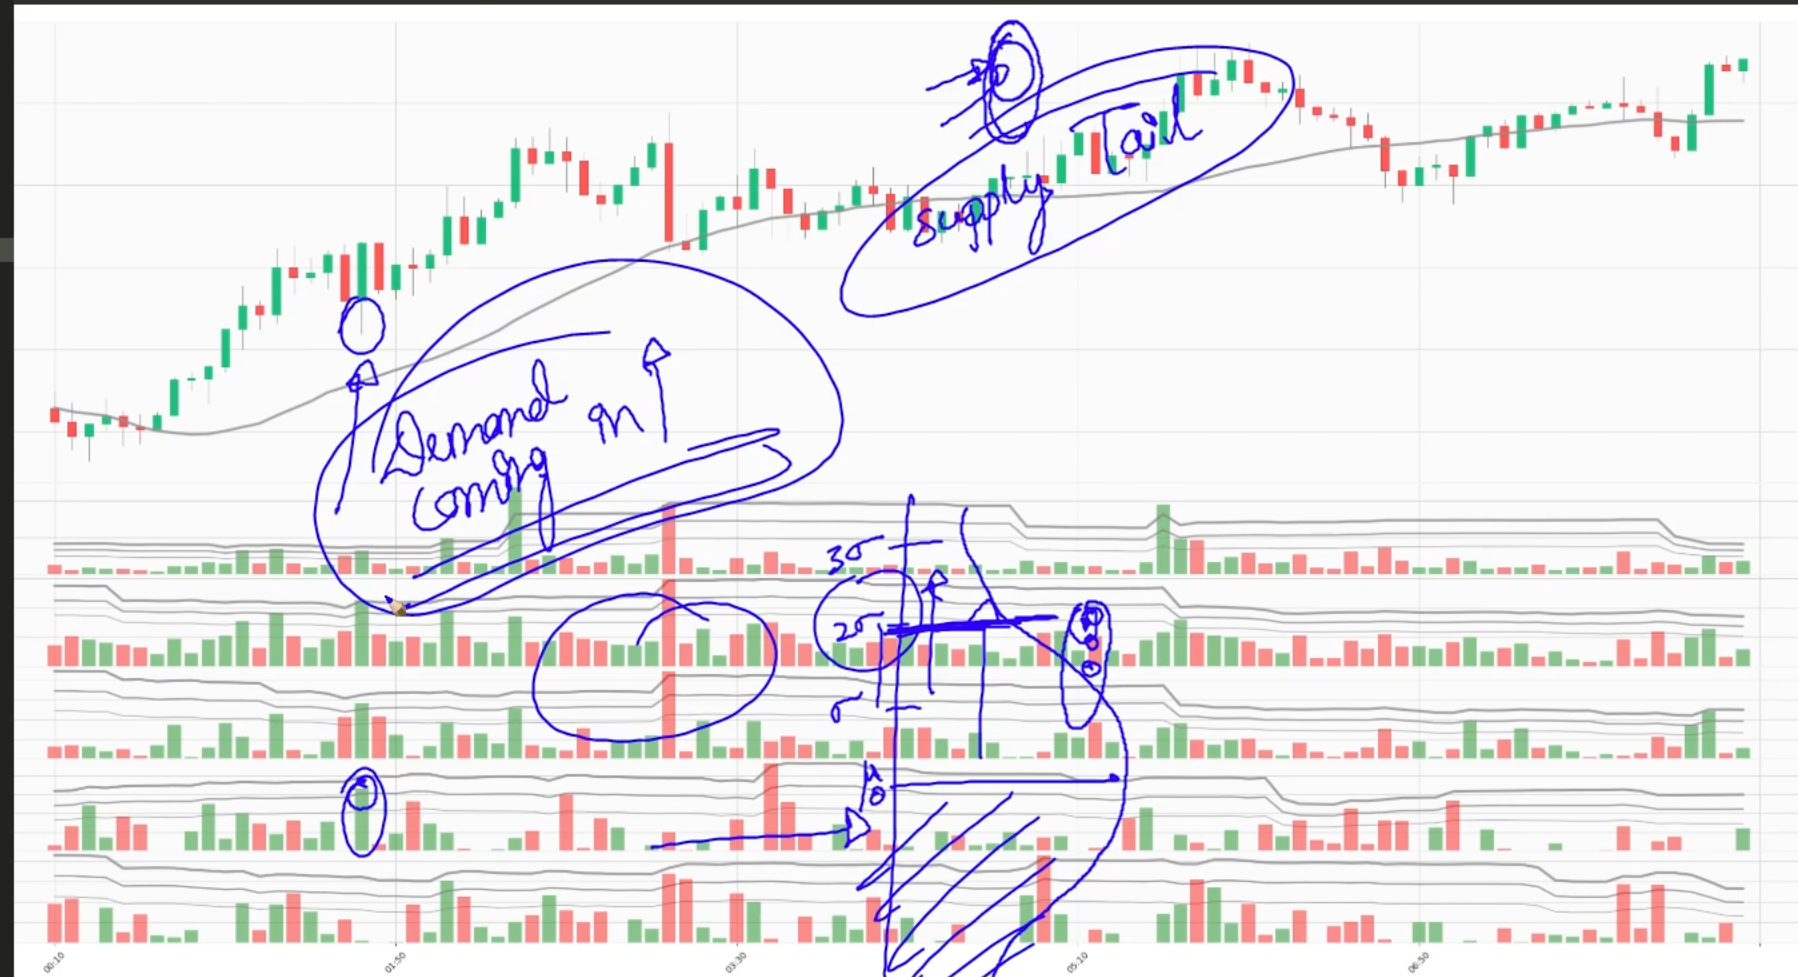